In [ ]:
# -------------------------
# Task 1: Sentiment Labeling using Transformers (Optimized for dataset)
# -------------------------

import pandas as pd
from transformers import pipeline
import math

# 1. Load dataset
df = pd.read_csv("test(in).csv")

# Combine subject + body (in case body is empty)
df["text"] = df["body"].fillna("") + " " + df["Subject"].fillna("")

# Fill empty texts with placeholder
df["text"] = df["text"].apply(lambda x: str(x).strip() if str(x).strip() != "" else "No content")

print("Dataset Shape:", df.shape)
print(df[["Subject", "body", "text"]].head())

# 2. Load HuggingFace pretrained sentiment model
sentiment_model = pipeline("sentiment-analysis",
                           model="distilbert-base-uncased-finetuned-sst-2-english",
                           device=-1)  # change to 0 if you have GPU

# 3. Function to map BERT labels to 3-class sentiment
def map_sentiment(result):
    label, score = result["label"], result["score"]
    if label == "POSITIVE" and score > 0.6:
        return "Positive"
    elif label == "NEGATIVE" and score > 0.6:
        return "Negative"
    else:
        return "Neutral"

# 4. Batch processing for speed
batch_size = 32
sentiments = []

for i in range(0, len(df), batch_size):
    batch_texts = df["text"].iloc[i:i+batch_size].tolist()
    results = sentiment_model(batch_texts, truncation=True)  # allow truncation if >512 tokens
    sentiments.extend([map_sentiment(r) for r in results])
    print(f"Processed {i+len(batch_texts)}/{len(df)} rows")

df["Sentiment"] = sentiments

# 5. Save labeled dataset
df.to_csv("labeled_dataset.csv", index=False)

print("✅ Sentiment labeling complete.")
print(df[["from", "date", "Sentiment"]].head())
print("\nSentiment Distribution:")
print(df["Sentiment"].value_counts())


Dataset Shape: (2191, 5)
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body  \
0  EnronOptions Announcement\n\n\nWe have updated...   
1  Marc,\n\nUnfortunately, today is not going to ...   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   
3  we were thinking papasitos (we can meet somewh...   
4  Since you never gave me the $20 for the last t...   

                                                text  
0  EnronOptions Announcement\n\n\nWe have updated...  
1  Marc,\n\nUnfortunately, today is not going to ...  
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  
3  we were thinking papasitos (we can meet somewh...  
4  Since you never gave me the $20 for the last t...  


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Processed 32/2191 rows
Processed 64/2191 rows
Processed 96/2191 rows
Processed 128/2191 rows
Processed 160/2191 rows
Processed 192/2191 rows
Processed 224/2191 rows
Processed 256/2191 rows
Processed 288/2191 rows
Processed 320/2191 rows
Processed 352/2191 rows
Processed 384/2191 rows
Processed 416/2191 rows
Processed 448/2191 rows
Processed 480/2191 rows
Processed 512/2191 rows
Processed 544/2191 rows
Processed 576/2191 rows
Processed 608/2191 rows
Processed 640/2191 rows
Processed 672/2191 rows
Processed 704/2191 rows
Processed 736/2191 rows
Processed 768/2191 rows
Processed 800/2191 rows
Processed 832/2191 rows
Processed 864/2191 rows
Processed 896/2191 rows
Processed 928/2191 rows
Processed 960/2191 rows
Processed 992/2191 rows
Processed 1024/2191 rows
Processed 1056/2191 rows
Processed 1088/2191 rows
Processed 1120/2191 rows
Processed 1152/2191 rows
Processed 1184/2191 rows
Processed 1216/2191 rows
Processed 1248/2191 rows
Processed 1280/2191 rows
Processed 1312/2191 rows
Processed

Dataset Shape: (2191, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Subject    2191 non-null   object        
 1   body       2191 non-null   object        
 2   date       2191 non-null   datetime64[ns]
 3   from       2191 non-null   object        
 4   text       2191 non-null   object        
 5   Sentiment  2191 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 102.8+ KB
None
Sentiment
Negative    1322
Positive     821
Neutral       48
Name: count, dtype: int64


/tmp/ipython-input-412245774.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", order=["Positive","Neutral","Negative"], palette="Set2")


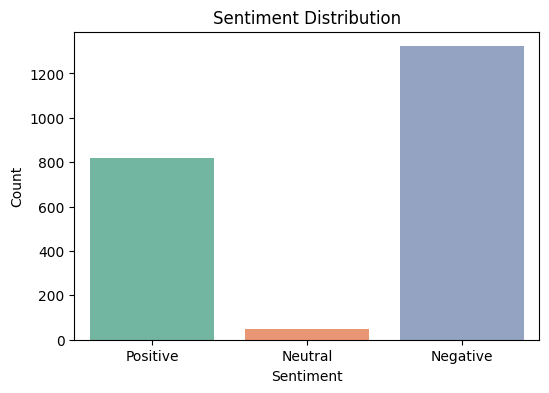

<Figure size 1000x600 with 0 Axes>

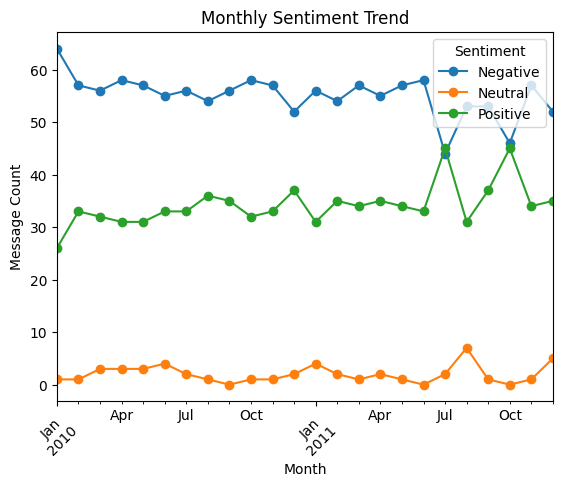

<Figure size 1200x600 with 0 Axes>

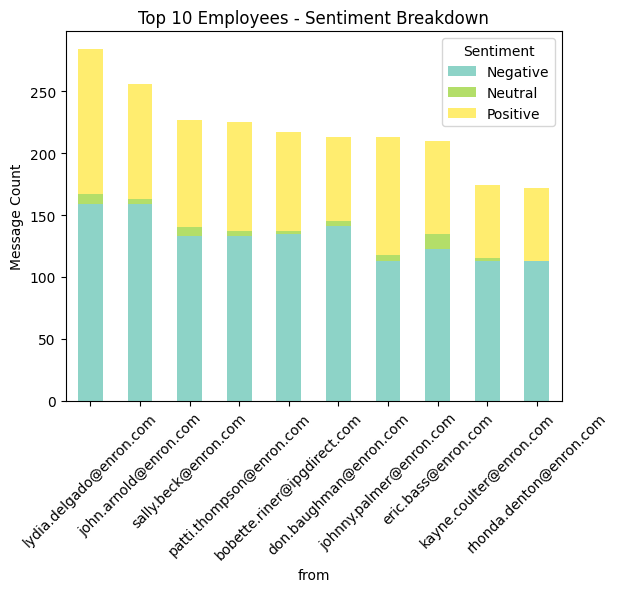

/tmp/ipython-input-412245774.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sentiment", y="msg_length", order=["Positive","Neutral","Negative"], palette="Set2")


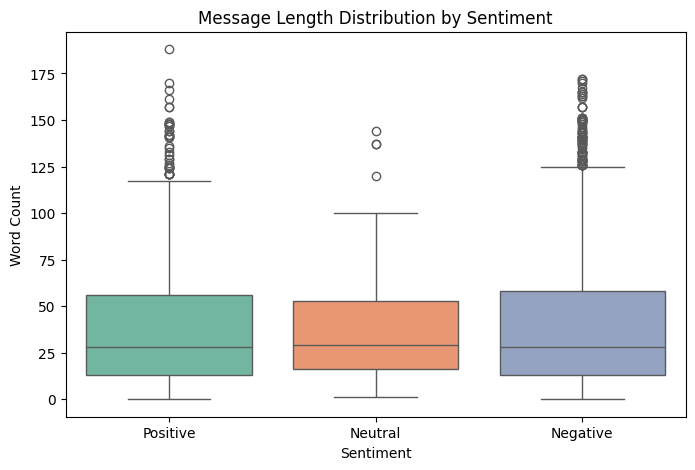

In [ ]:
# -------------------------
# Task 2: Exploratory Data Analysis (EDA)
# -------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load labeled dataset
df = pd.read_csv("labeled_dataset.csv")

# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Basic info
print("Dataset Shape:", df.shape)
print(df.info())
print(df["Sentiment"].value_counts())

# -----------------------------
# 2. Sentiment Distribution
# -----------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sentiment", order=["Positive","Neutral","Negative"], palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 3. Sentiment Trend Over Time
# -----------------------------
monthly_trend = df.groupby([df["date"].dt.to_period("M"), "Sentiment"]).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
monthly_trend.plot(kind="line", marker="o")
plt.title("Monthly Sentiment Trend")
plt.ylabel("Message Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

# -----------------------------
# 4. Employee-wise Sentiment
# -----------------------------
employee_sent = df.groupby(["from", "Sentiment"]).size().unstack(fill_value=0)

# Top 10 employees by activity
top_employees = employee_sent.sum(axis=1).sort_values(ascending=False).head(10)
employee_sent_top = employee_sent.loc[top_employees.index]

plt.figure(figsize=(12,6))
employee_sent_top.plot(kind="bar", stacked=True, colormap="Set3")
plt.title("Top 10 Employees - Sentiment Breakdown")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 5. Message Characteristics
# -----------------------------
# Add message length column
df["msg_length"] = df["body"].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Sentiment", y="msg_length", order=["Positive","Neutral","Negative"], palette="Set2")
plt.title("Message Length Distribution by Sentiment")
plt.ylabel("Word Count")
plt.show()


In [ ]:
# -------------------------
# Task 3: Employee Score Calculation
# -------------------------

import pandas as pd

# Load labeled dataset
df = pd.read_csv("labeled_dataset.csv")

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Map sentiment to numeric score
sentiment_map = {"Positive": 1, "Negative": -1, "Neutral": 0}
df["Sentiment_Score"] = df["Sentiment"].map(sentiment_map)

# Extract year-month for grouping
df["YearMonth"] = df["date"].dt.to_period("M")

# Group by employee + month
monthly_scores = df.groupby(["from", "YearMonth"])["Sentiment_Score"].sum().reset_index()

# Pivot for better readability
score_pivot = monthly_scores.pivot(index="from", columns="YearMonth", values="Sentiment_Score").fillna(0)

# Save results
monthly_scores.to_csv("employee_monthly_scores.csv", index=False)

print("✅ Employee monthly scores calculated.")
print(monthly_scores.head())


✅ Employee monthly scores calculated.
                          from YearMonth  Sentiment_Score
0  bobette.riner@ipgdirect.com   2010-01               -2
1  bobette.riner@ipgdirect.com   2010-02               -4
2  bobette.riner@ipgdirect.com   2010-03               -3
3  bobette.riner@ipgdirect.com   2010-04               -2
4  bobette.riner@ipgdirect.com   2010-05                2


In [ ]:
# -------------------------
# Task 4: Employee Ranking
# -------------------------

import pandas as pd

# Load monthly scores (from Task 3)
monthly_scores = pd.read_csv("employee_monthly_scores.csv")

# Ensure proper types
monthly_scores["YearMonth"] = pd.PeriodIndex(monthly_scores["YearMonth"], freq="M")

# Function to get top 3 positive & negative employees per month
def rank_employees(group):
    # Sort for positive
    top_pos = group.sort_values(
        by=["Sentiment_Score", "from"],
        ascending=[False, True]
    ).head(3)

    # Sort for negative
    top_neg = group.sort_values(
        by=["Sentiment_Score", "from"],
        ascending=[True, True]
    ).head(3)

    return pd.DataFrame({
        "Month": [group["YearMonth"].iloc[0]]*6,
        "Type": ["Top Positive"]*3 + ["Top Negative"]*3,
        "Employee": pd.concat([top_pos["from"], top_neg["from"]]).values,
        "Score": pd.concat([top_pos["Sentiment_Score"], top_neg["Sentiment_Score"]]).values
    })

# Apply per month
rankings = monthly_scores.groupby("YearMonth").apply(rank_employees).reset_index(drop=True)

# Save results
rankings.to_csv("employee_rankings.csv", index=False)

print("✅ Rankings calculated. Sample output:")
print(rankings.head(10))


✅ Rankings calculated. Sample output:
     Month          Type                     Employee  Score
0  2010-01  Top Positive        john.arnold@enron.com     -1
1  2010-01  Top Positive      rhonda.denton@enron.com     -1
2  2010-01  Top Positive  bobette.riner@ipgdirect.com     -2
3  2010-01  Top Negative      kayne.coulter@enron.com    -10
4  2010-01  Top Negative       don.baughman@enron.com     -5
5  2010-01  Top Negative      lydia.delgado@enron.com     -5
6  2010-02  Top Positive       don.baughman@enron.com      1
7  2010-02  Top Positive      lydia.delgado@enron.com      1
8  2010-02  Top Positive          eric.bass@enron.com      0
9  2010-02  Top Negative        john.arnold@enron.com    -11


/tmp/ipython-input-2298435883.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rankings = monthly_scores.groupby("YearMonth").apply(rank_employees).reset_index(drop=True)


In [ ]:
# -------------------------
# Task 5: Flight Risk Identification
# -------------------------

import pandas as pd

# Load dataset with sentiments
df = pd.read_csv("labeled_dataset.csv")

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Keep only negative messages
negatives = df[df["Sentiment"] == "Negative"].copy()

# Sort by employee & date
negatives = negatives.sort_values(by=["from", "date"])

# Function to detect flight risk for one employee
def detect_flight_risk(group):
    risks = []
    dates = group["date"].tolist()

    for i in range(len(dates)):
        # window = 30 days after current message
        window_start = dates[i]
        window_end = window_start + pd.Timedelta(days=30)

        # count negatives in this 30-day window
        count = sum((d >= window_start) and (d <= window_end) for d in dates)

        if count >= 4:
            risks.append({
                "Employee": group["from"].iloc[0],
                "Risk_Start": window_start,
                "Risk_End": window_end,
                "Neg_Count": count
            })

    return pd.DataFrame(risks)

# Apply for each employee
flight_risks = negatives.groupby("from").apply(detect_flight_risk).reset_index(drop=True)

# Drop duplicates (employee flagged once is enough)
flight_risks = flight_risks.drop_duplicates(subset=["Employee"])

# Save results
flight_risks.to_csv("flight_risk_employees.csv", index=False)

print("✅ Flight risk identification complete.")
print(flight_risks.head())


✅ Flight risk identification complete.
                        Employee Risk_Start   Risk_End  Neg_Count
0    bobette.riner@ipgdirect.com 2010-01-23 2010-02-22          8
118       don.baughman@enron.com 2010-01-02 2010-02-01          7
238          eric.bass@enron.com 2010-01-02 2010-02-01          7
338        john.arnold@enron.com 2010-01-10 2010-02-09          7
488      johnny.palmer@enron.com 2010-01-01 2010-01-31          4


/tmp/ipython-input-902866187.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  flight_risks = negatives.groupby("from").apply(detect_flight_risk).reset_index(drop=True)


✅ Linear Regression Results
R² Score: 1.0
MAE: 0.0
RMSE: 0.0


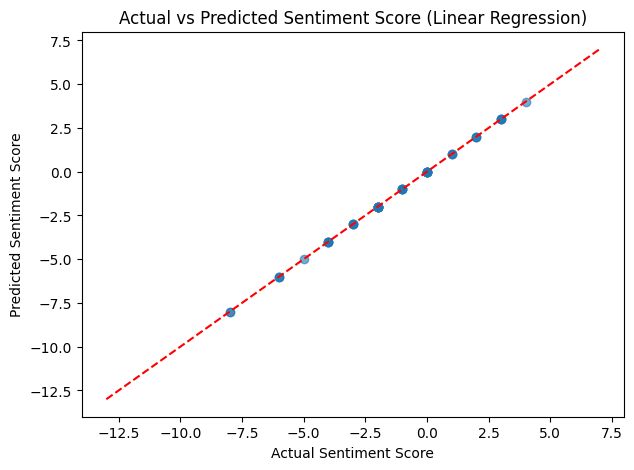


Feature Importance:
          Feature   Coefficient
3       Pos_Count  1.000000e+00
1  Avg_Msg_Length  3.382711e-17
0       Msg_Count  1.389078e-17
2     Total_Words  1.734723e-18
5       Neu_Count -1.419714e-15
4       Neg_Count -1.000000e+00


In [ ]:
# -------------------------
# Task 6: Predictive Modeling (Linear Regression)
# -------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load labeled dataset
df = pd.read_csv("labeled_dataset.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# -------------------------
# Feature Engineering
# -------------------------

# Add message length
df["msg_length"] = df["body"].astype(str).apply(lambda x: len(x.split()))

# Map sentiment to numeric score
sentiment_map = {"Positive": 1, "Negative": -1, "Neutral": 0}
df["Sentiment_Score"] = df["Sentiment"].map(sentiment_map)

# Extract Year-Month
df["YearMonth"] = df["date"].dt.to_period("M")

# Aggregate features per employee per month
features = df.groupby(["from", "YearMonth"]).agg(
    Monthly_Sentiment=("Sentiment_Score", "sum"),   # Target variable
    Msg_Count=("body", "count"),
    Avg_Msg_Length=("msg_length", "mean"),
    Total_Words=("msg_length", "sum"),
    Pos_Count=("Sentiment", lambda x: (x=="Positive").sum()),
    Neg_Count=("Sentiment", lambda x: (x=="Negative").sum()),
    Neu_Count=("Sentiment", lambda x: (x=="Neutral").sum())
).reset_index()

# Features and Target
X = features[["Msg_Count", "Avg_Msg_Length", "Total_Words", "Pos_Count", "Neg_Count", "Neu_Count"]]
y = features["Monthly_Sentiment"]

# -------------------------
# Train/Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# Model Training
# -------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------
# Predictions & Evaluation
# -------------------------
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Linear Regression Results")
print("R² Score:", round(r2, 3))
print("MAE:", round(mae, 3))
print("RMSE:", round(rmse, 3))

# -------------------------
# Plot: Actual vs Predicted
# -------------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.xlabel("Actual Sentiment Score")
plt.ylabel("Predicted Sentiment Score")
plt.title("Actual vs Predicted Sentiment Score (Linear Regression)")
plt.show()

# Save model coefficients for interpretation
coef_summary = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance:")
print(coef_summary)
